In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from spacepy import pycdf
from datetime import datetime, timedelta
import os

In [2]:
datasets = []
for filename in sorted(os.listdir('fsmi_data')):
    datasets.append(pycdf.CDF('fsmi_data/' + filename))
    print(filename)
    

thg_l2_mag_fsmi_20080201_v01.cdf
thg_l2_mag_fsmi_20080202_v01.cdf
thg_l2_mag_fsmi_20080203_v01.cdf
thg_l2_mag_fsmi_20080204_v01.cdf
thg_l2_mag_fsmi_20080205_v01.cdf
thg_l2_mag_fsmi_20080206_v01.cdf
thg_l2_mag_fsmi_20080207_v01.cdf
thg_l2_mag_fsmi_20080208_v01.cdf
thg_l2_mag_fsmi_20080209_v01.cdf
thg_l2_mag_fsmi_20080210_v01.cdf
thg_l2_mag_fsmi_20080211_v01.cdf
thg_l2_mag_fsmi_20080212_v01.cdf
thg_l2_mag_fsmi_20080213_v01.cdf
thg_l2_mag_fsmi_20080214_v01.cdf
thg_l2_mag_fsmi_20080215_v01.cdf
thg_l2_mag_fsmi_20080216_v01.cdf
thg_l2_mag_fsmi_20080217_v01.cdf
thg_l2_mag_fsmi_20080218_v01.cdf
thg_l2_mag_fsmi_20080219_v01.cdf
thg_l2_mag_fsmi_20080220_v01.cdf
thg_l2_mag_fsmi_20080221_v01.cdf
thg_l2_mag_fsmi_20080222_v01.cdf
thg_l2_mag_fsmi_20080223_v01.cdf
thg_l2_mag_fsmi_20080224_v01.cdf
thg_l2_mag_fsmi_20080225_v01.cdf
thg_l2_mag_fsmi_20080226_v01.cdf
thg_l2_mag_fsmi_20080227_v01.cdf
thg_l2_mag_fsmi_20080228_v01.cdf
thg_l2_mag_fsmi_20080229_v01.cdf


In [5]:
datasets[0]['range_epoch'][0]

datetime.datetime(2008, 2, 1, 0, 0)

In [87]:
def create_mag_dataframe(cdf):
    cdf_df = pd.DataFrame()
    start_time = cdf['range_epoch'][0]
    end_time = start_time + timedelta(1) # 23:59:59.5
    cdf_df['time'] = np.arange(start_time, end_time, timedelta(seconds=0.5))
    
    # magnetometer
    mag = cdf['thg_mag_fsmi'][:]
    cdf_df['Magnetic North - H (nT)'] = mag[:, 0]
    cdf_df['Magnetic East - E (nT)'] = mag[:, 1]
    cdf_df['Vertical Down - Z (nT)'] = mag[:, 2]
    
    # normalize
    mag_normalized = mag - np.nanmedian(mag, axis=0)
    cdf_df['H [Normalized]'] = mag_normalized[:, 0]
    cdf_df['E [Normalized]'] = mag_normalized[:, 1]
    cdf_df['Z [Normalized]'] = mag_normalized[:, 2]
    
    return cdf_df

In [88]:
cdf_dfs = []
for cdf in datasets:
    cdf_dfs.append(create_mag_dataframe(cdf))

In [89]:
def plot_single_date(df, date):
    fig = plt.figure(figsize=(17, 5))
    ax = fig.gca()
    plt.plot(df['time'], df['H [Normalized]'], label='H')
    plt.plot(df['time'], df['E [Normalized]'], label='E')
    plt.plot(df['time'], df['Z [Normalized]'], label='Z')
    plt.ylim(ymin=-700, ymax=400)
    plt.title('Day ' + str(date))
    plt.xlabel('Time')
    plt.ylabel('nT [Normalized]')
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
    plt.xticks(rotation=45)
    plt.grid()
    plt.legend()
    plt.show()

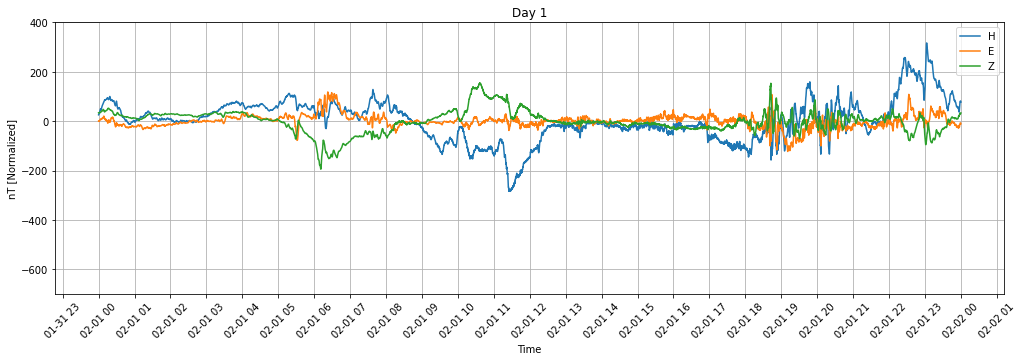

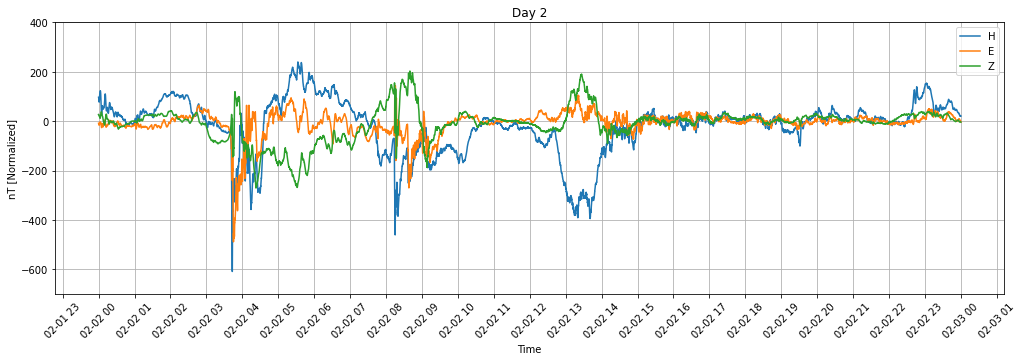

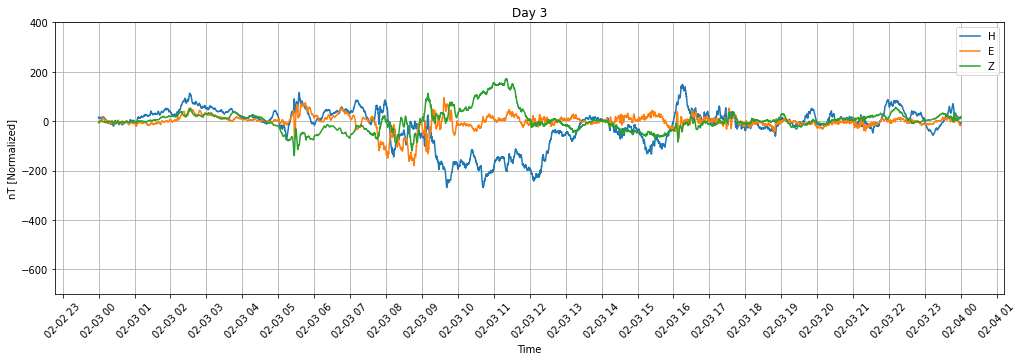

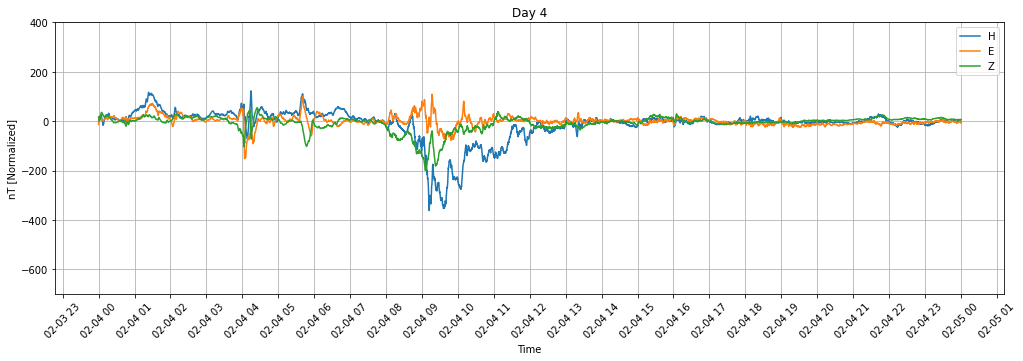

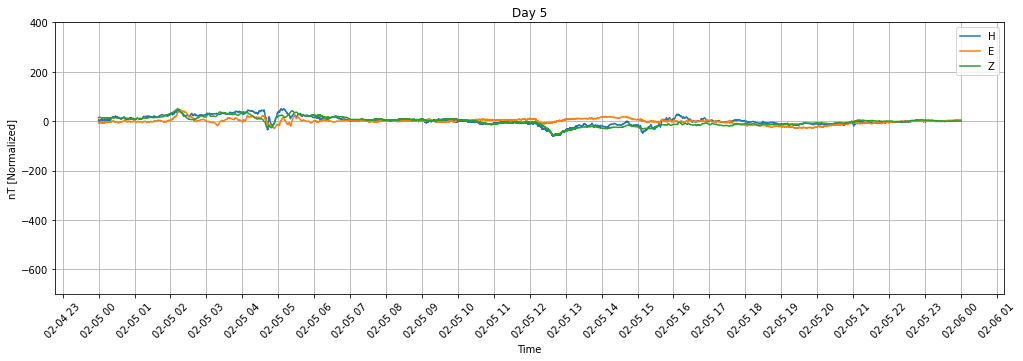

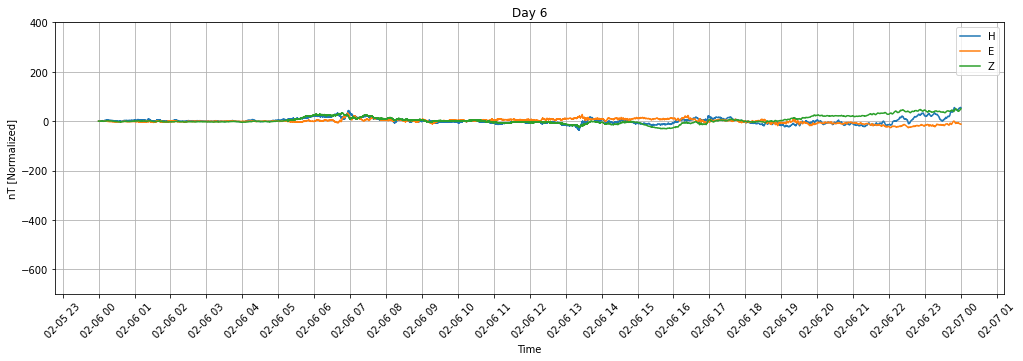

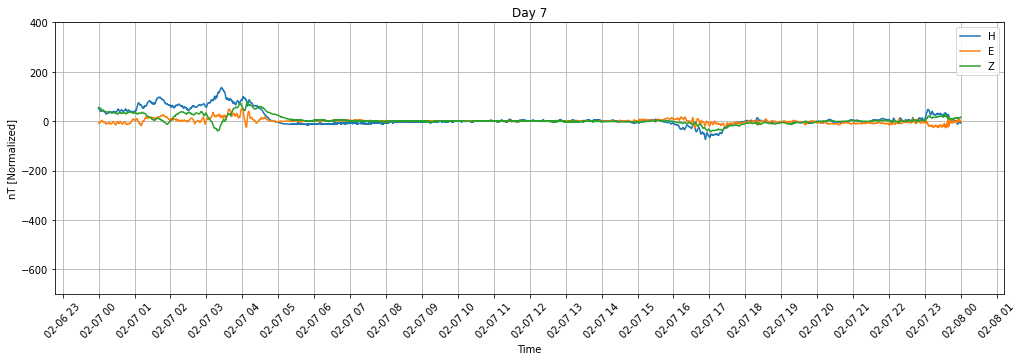

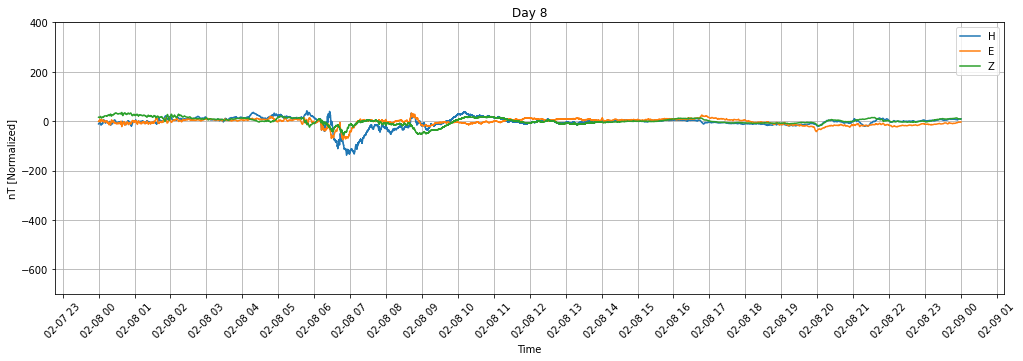

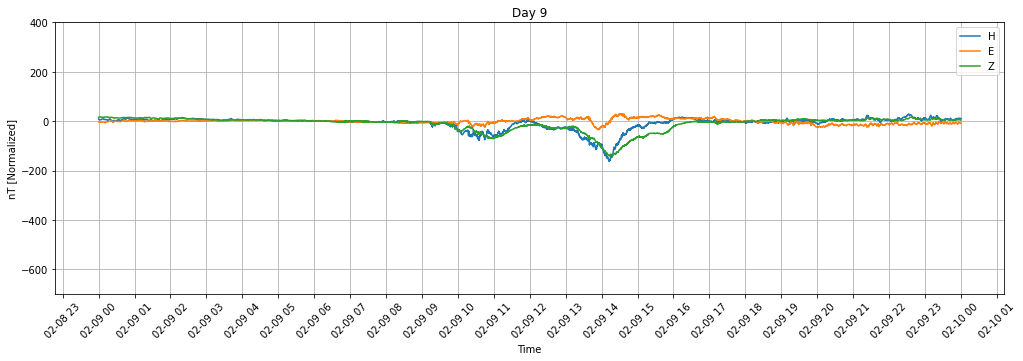

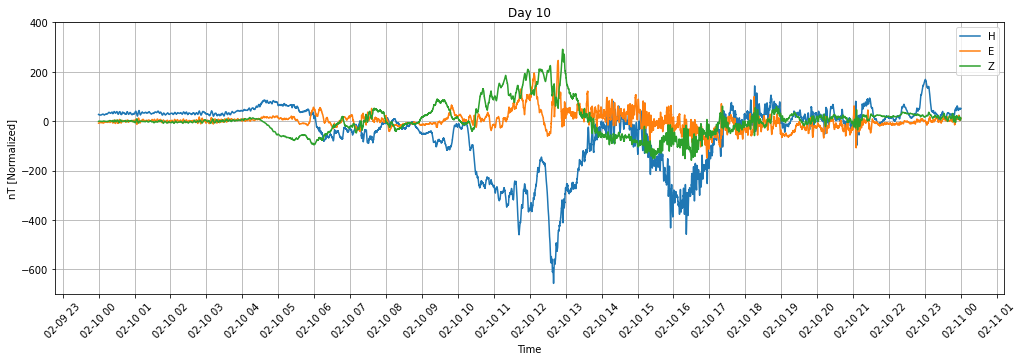

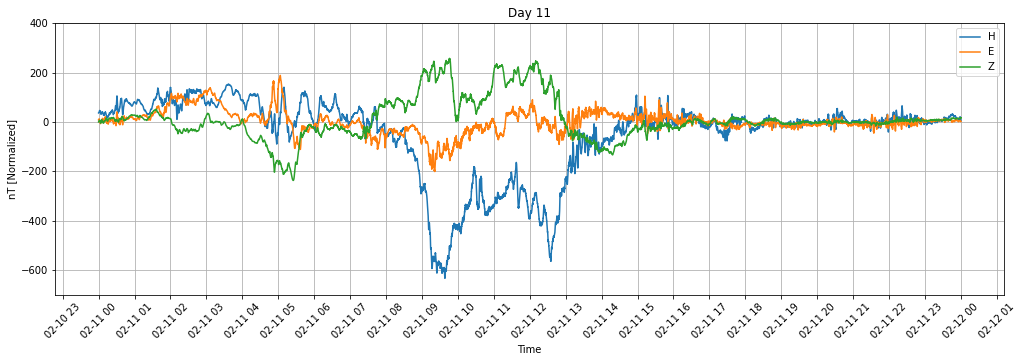

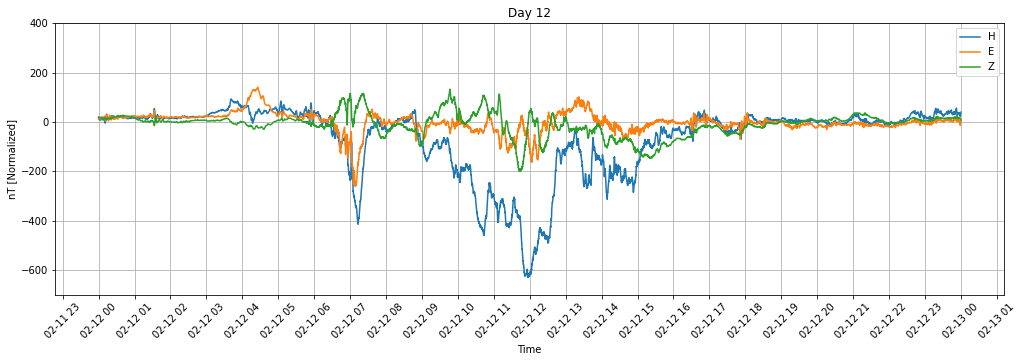

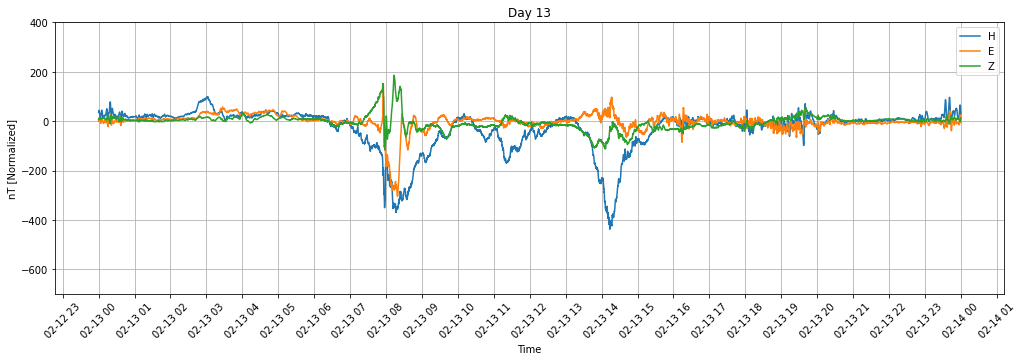

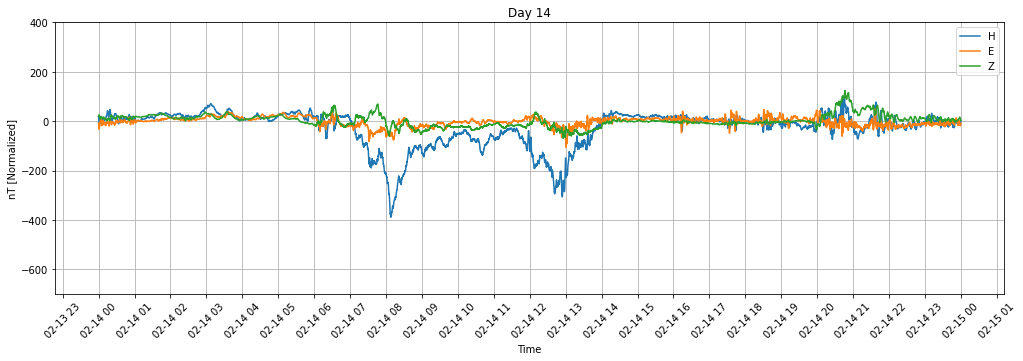

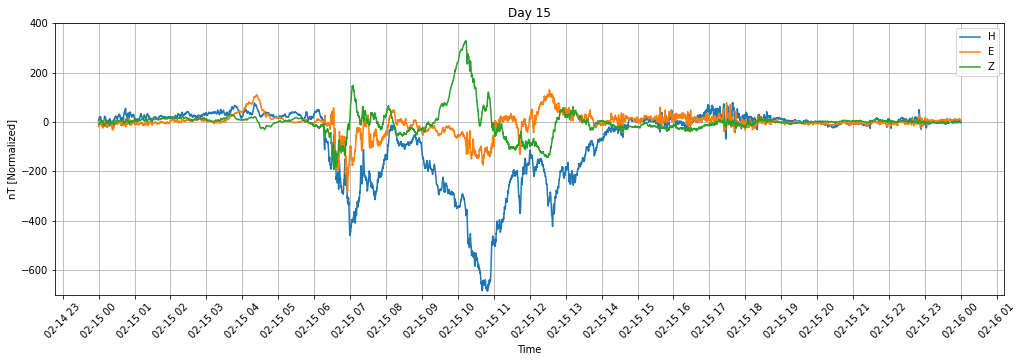

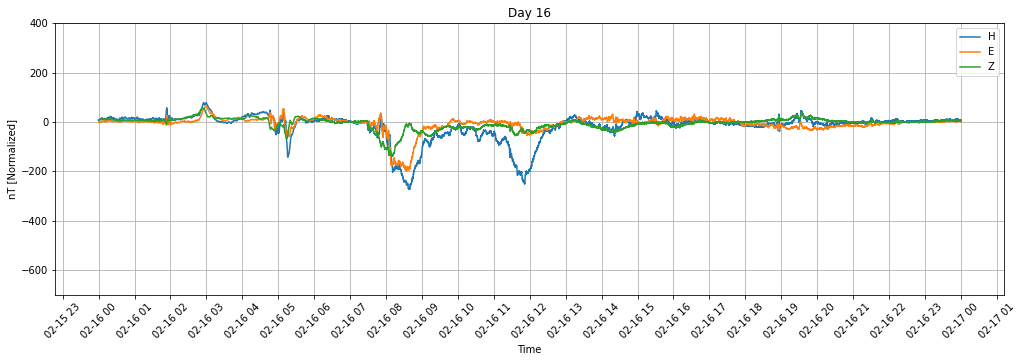

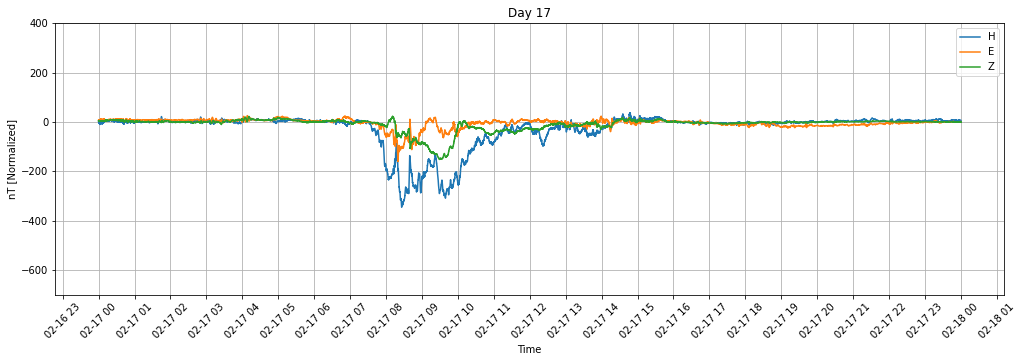

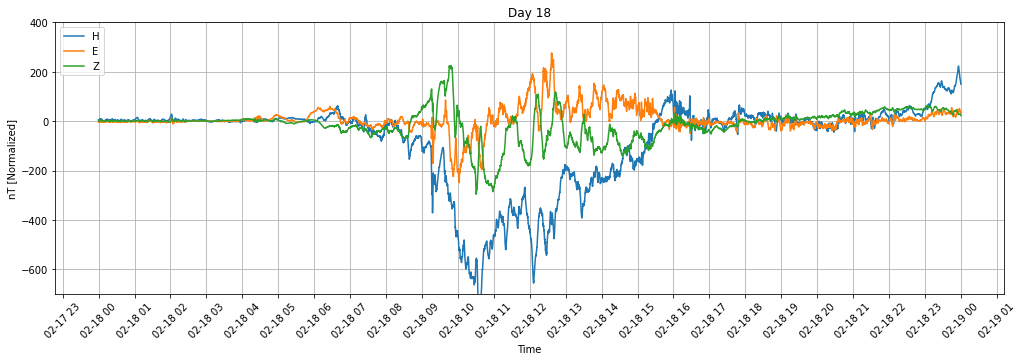

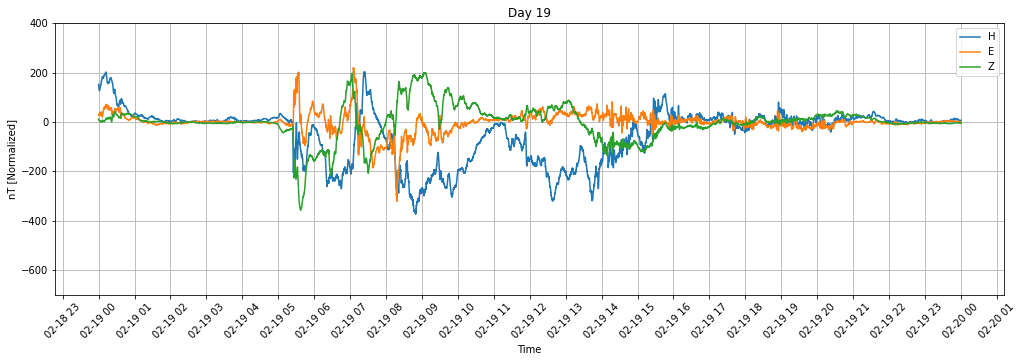

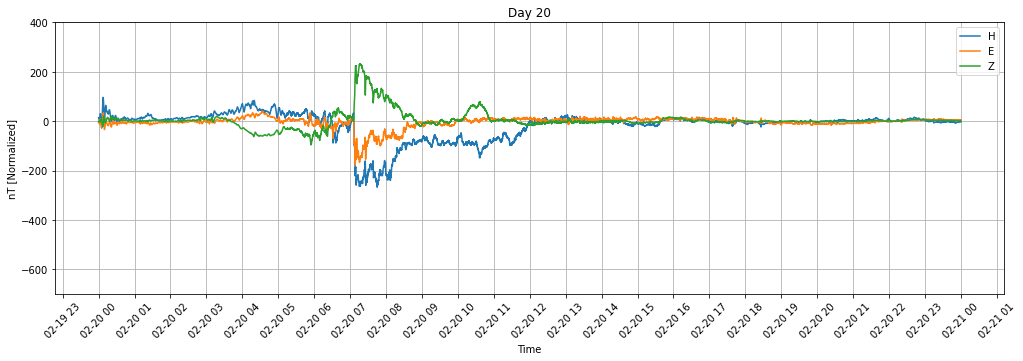

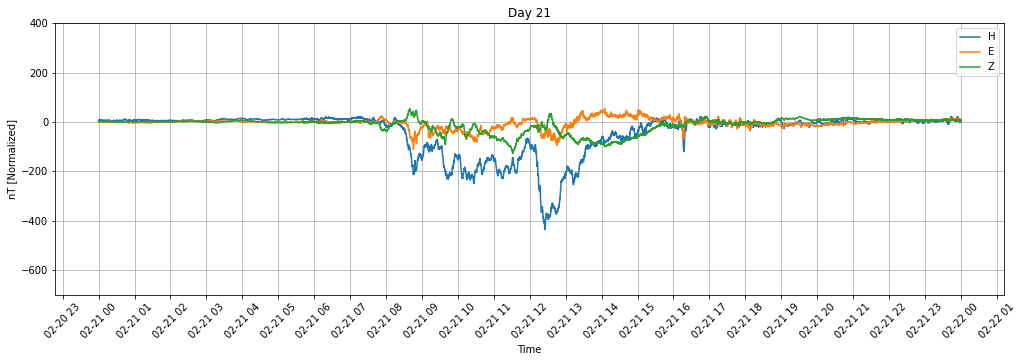

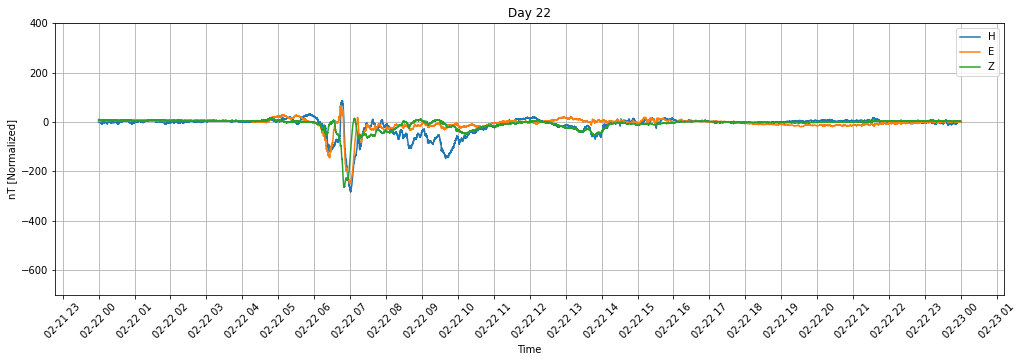

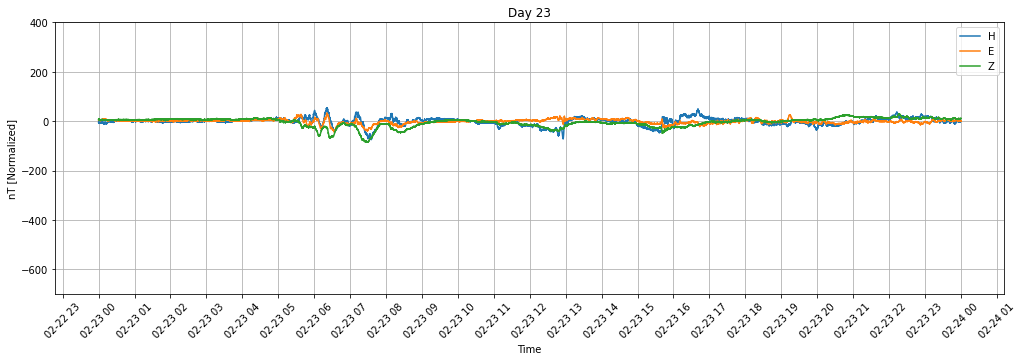

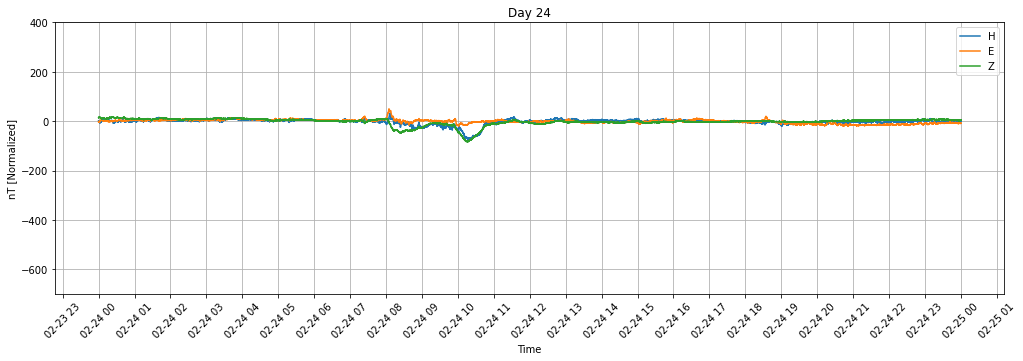

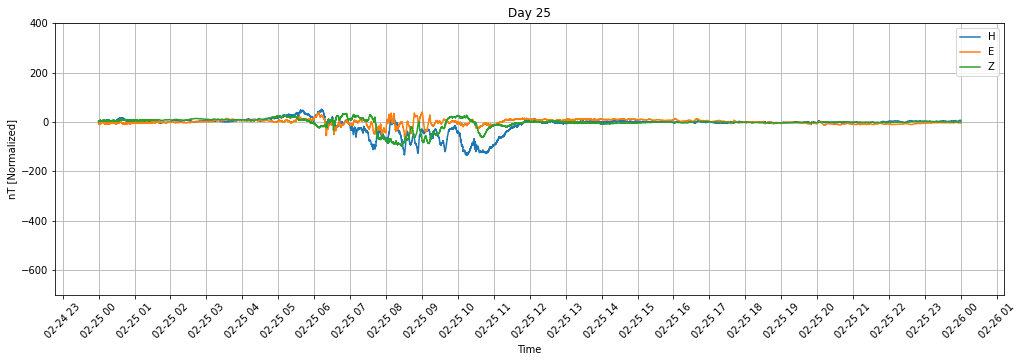

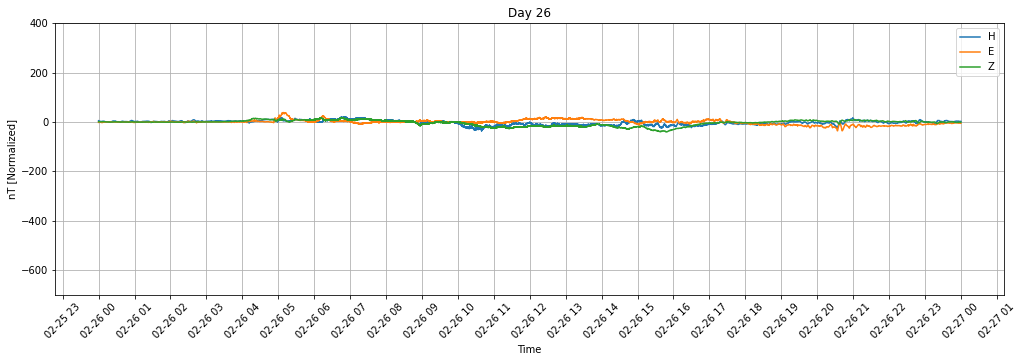

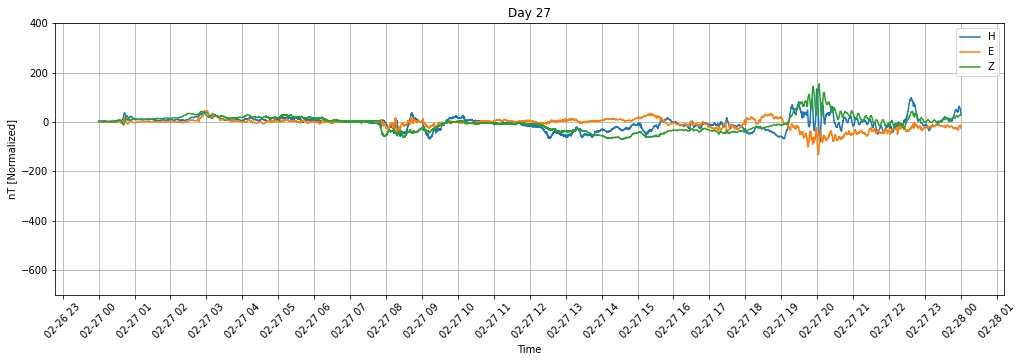

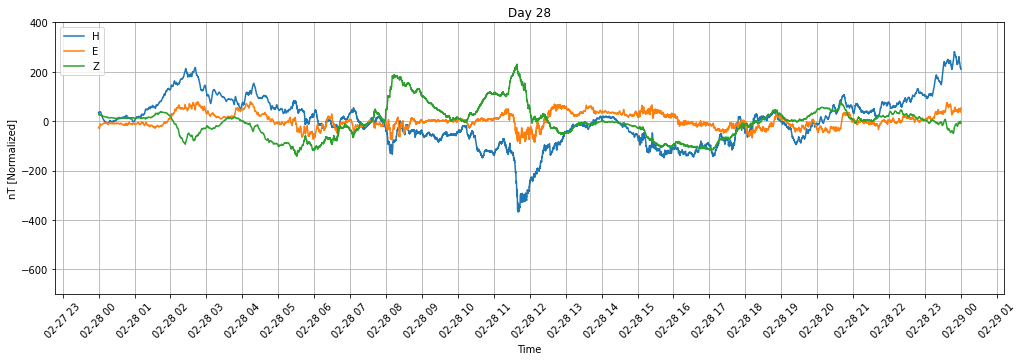

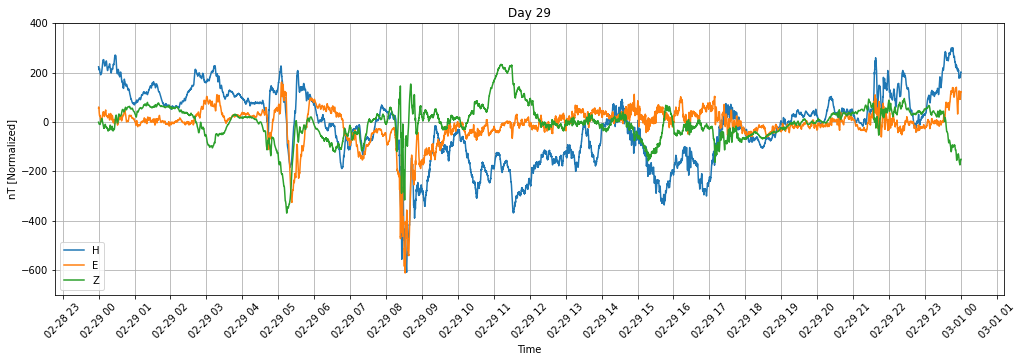

In [90]:
for i in range(len(cdf_dfs)):
    plot_single_date(cdf_dfs[i], i+1)

## Pattern

- **Length of pre-signs**: Day 20, 21 have long presigns while Day 13 has short one
- **Length of durations**: Some last longer (Day 29)
- **Number of substorms**: Some data have multiple substorms in a day (Day 29 at 5 and 8)
- **Timing**: mostly in daytime and none starts around 12AM
- **Sign of components**: all components goes negative for some substorms (Day 16, 17)

In [92]:
def plot_h_date(df, date):
    fig = plt.figure(figsize=(17, 5))
    ax = fig.gca()
    plt.plot(df['time'], df['H [Normalized]'], label='H')
    plt.ylim(ymin=-700, ymax=400)
    plt.title('Day ' + str(date))
    plt.xlabel('Time')
    plt.ylabel('nT [Normalized]')
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

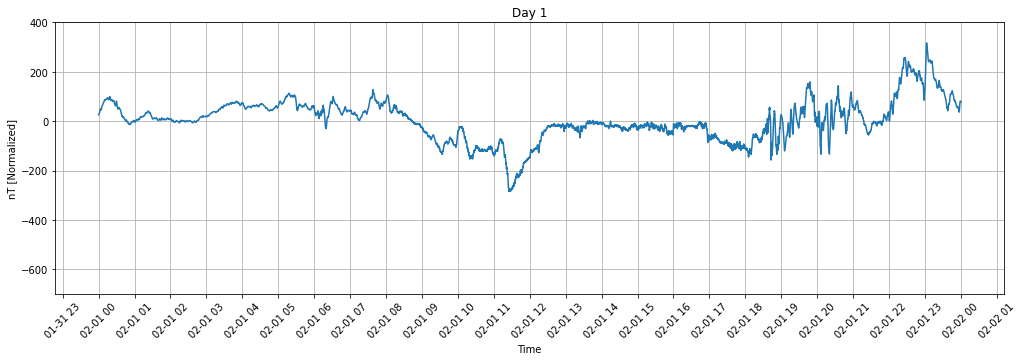

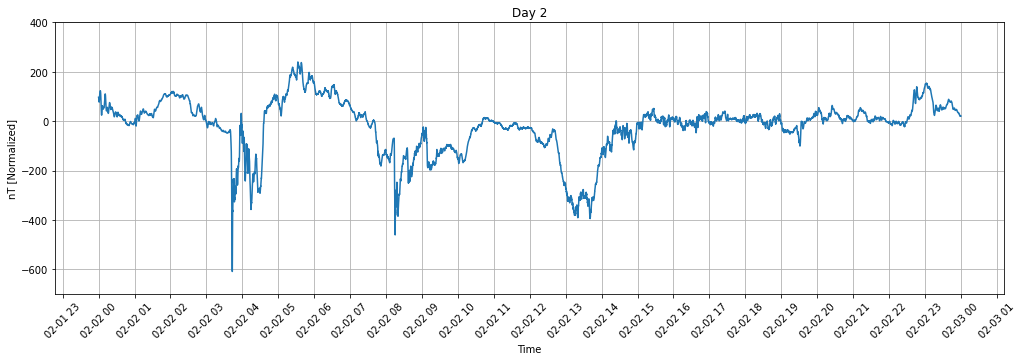

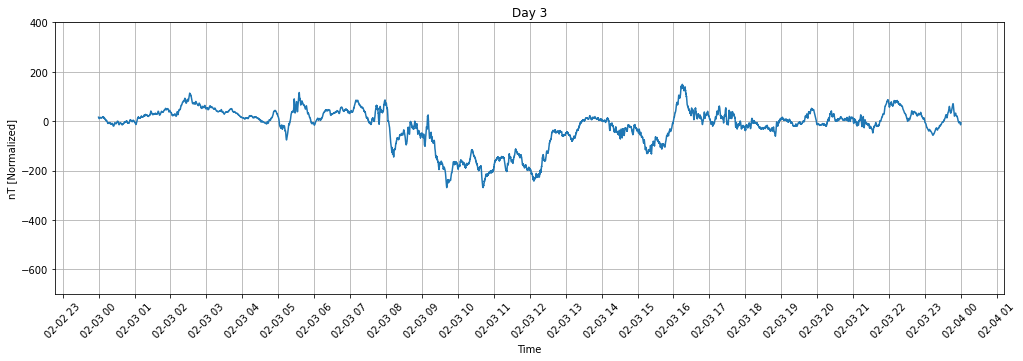

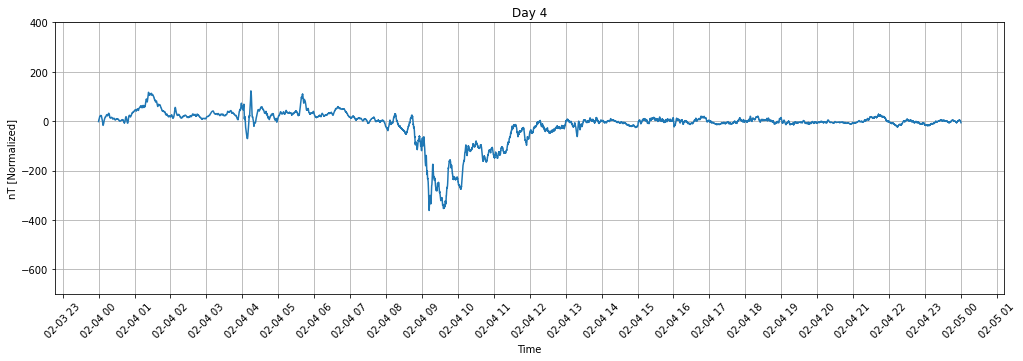

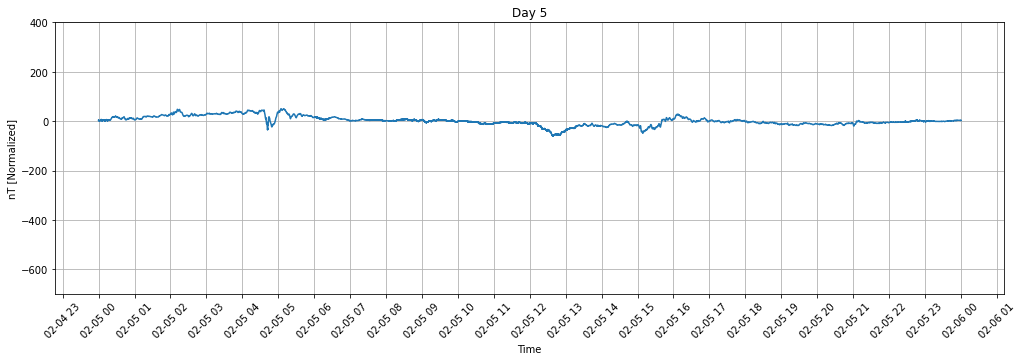

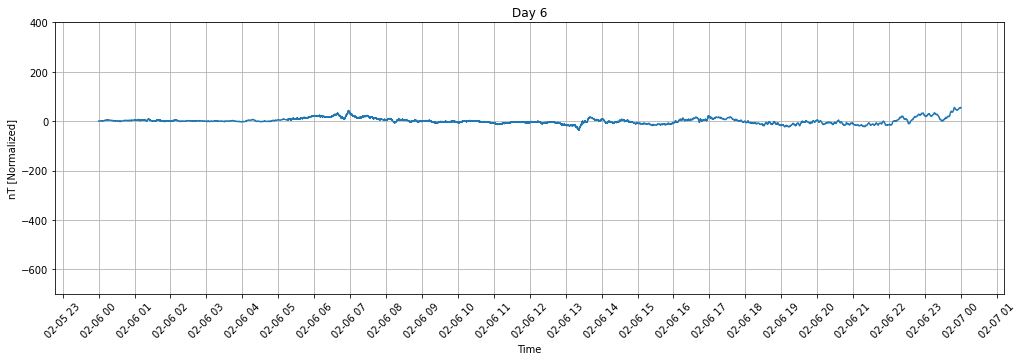

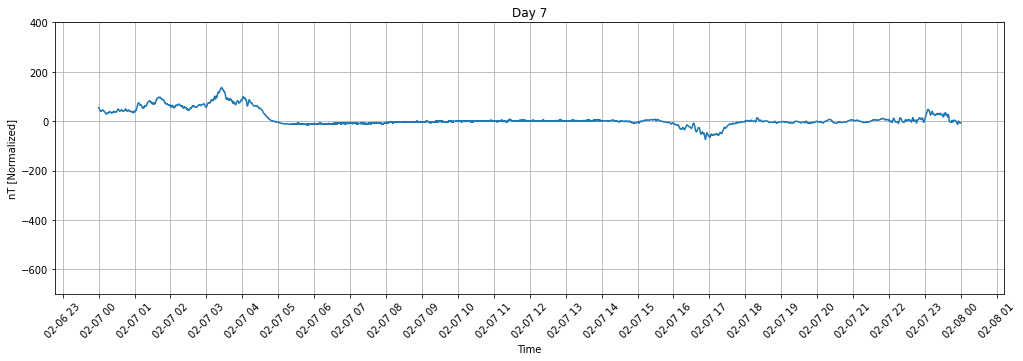

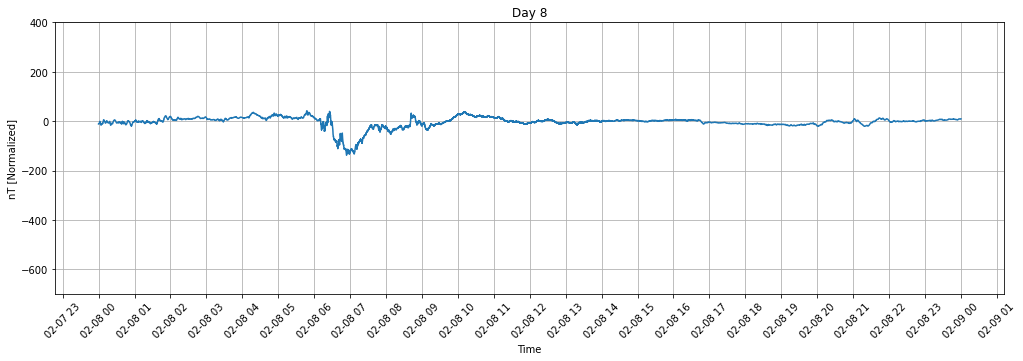

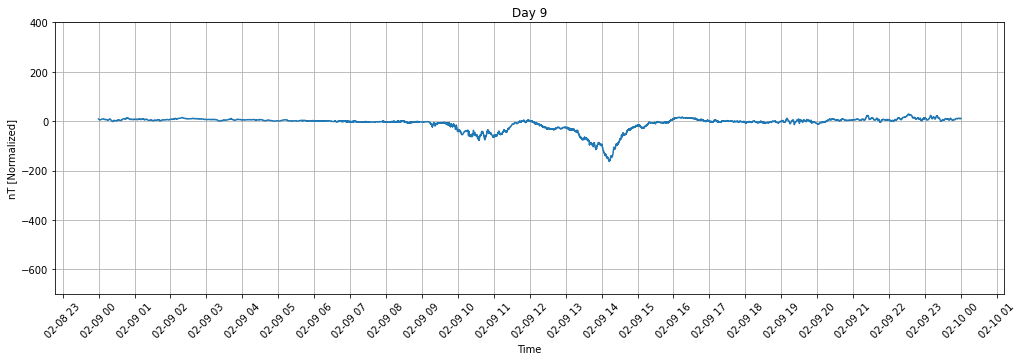

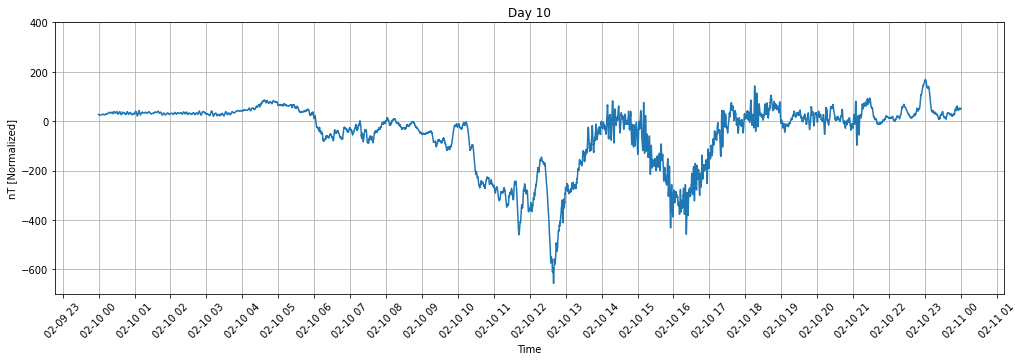

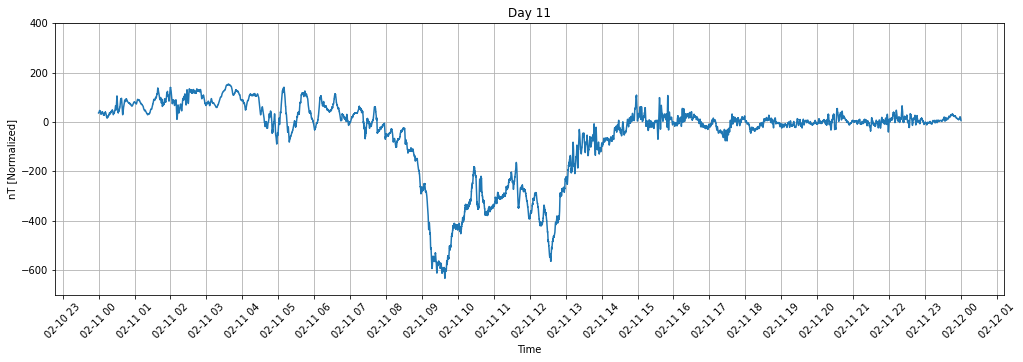

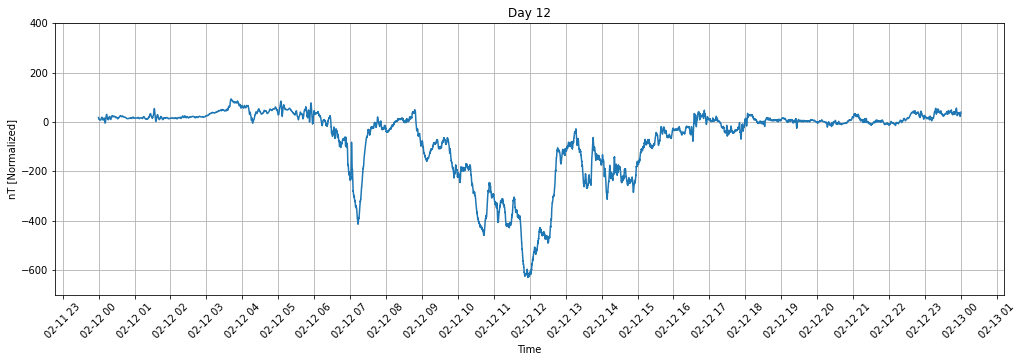

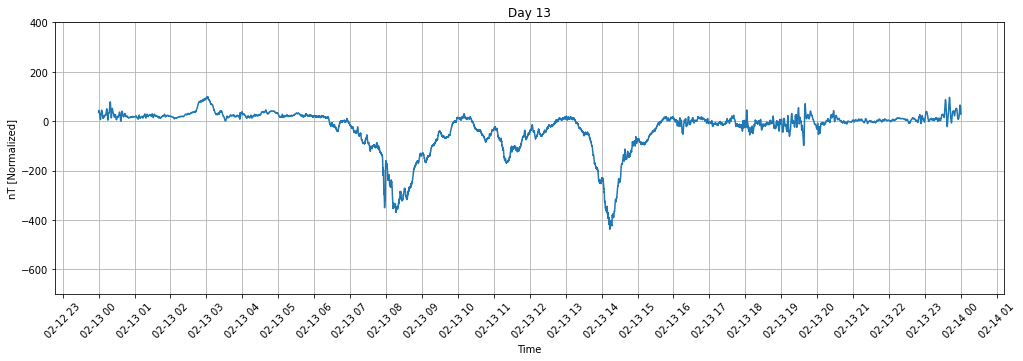

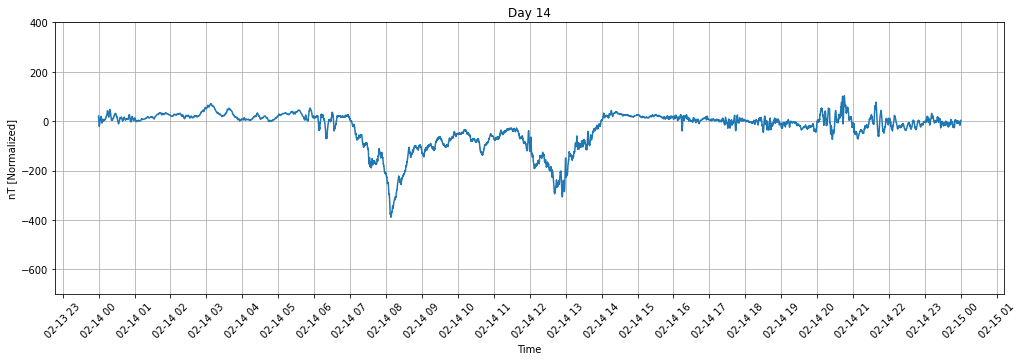

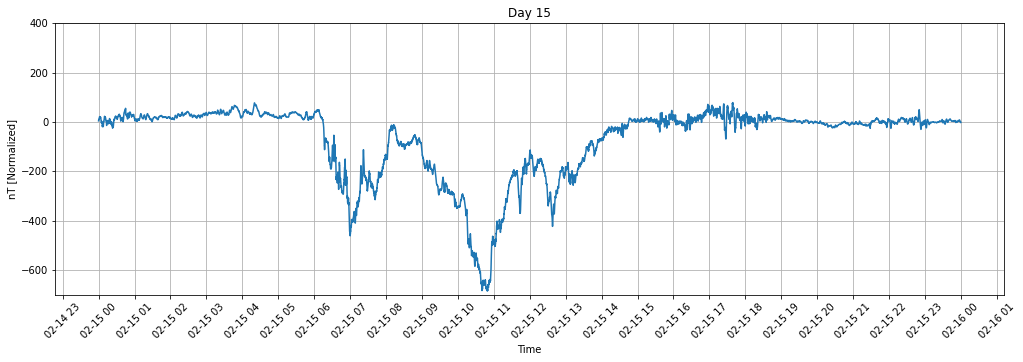

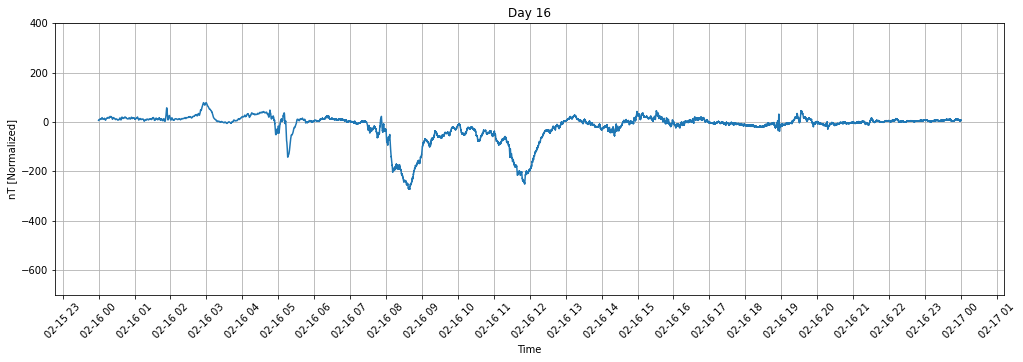

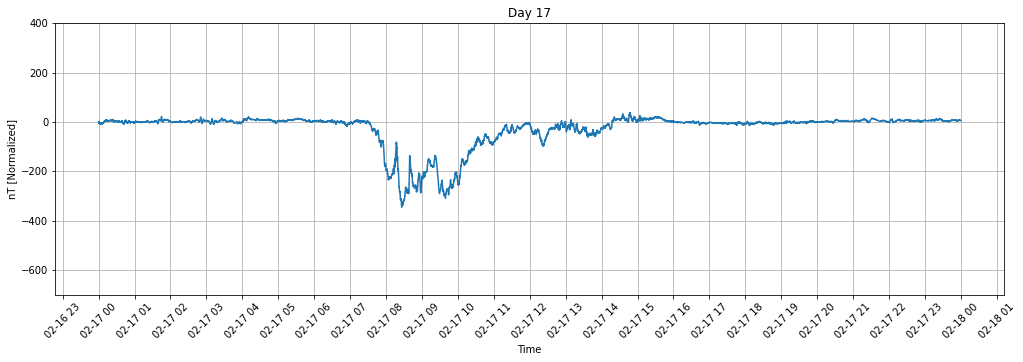

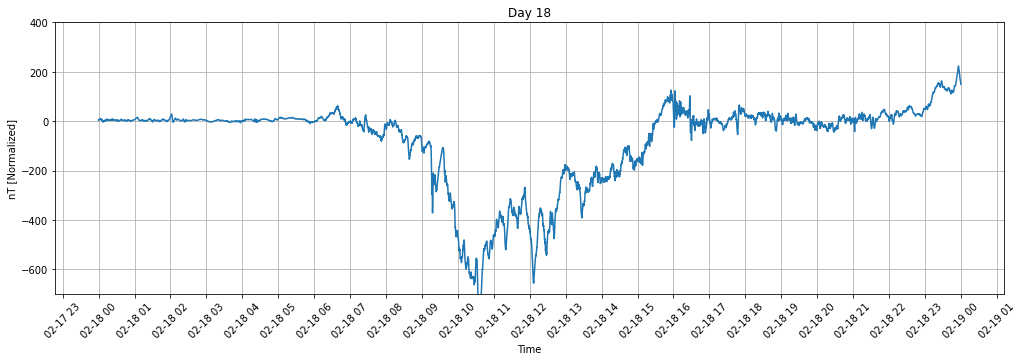

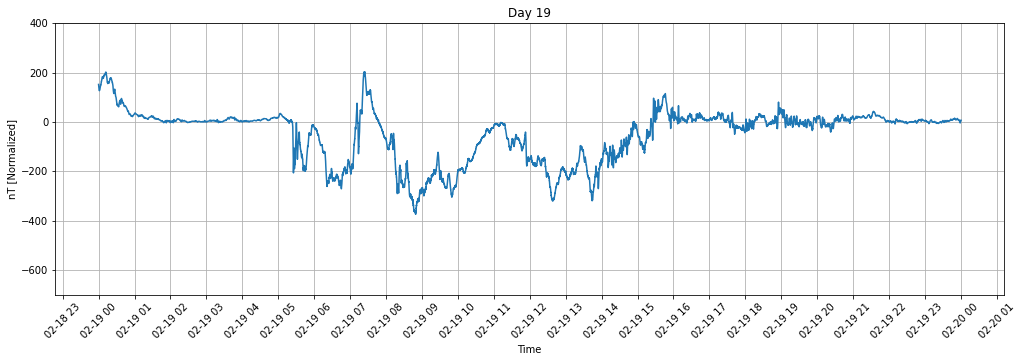

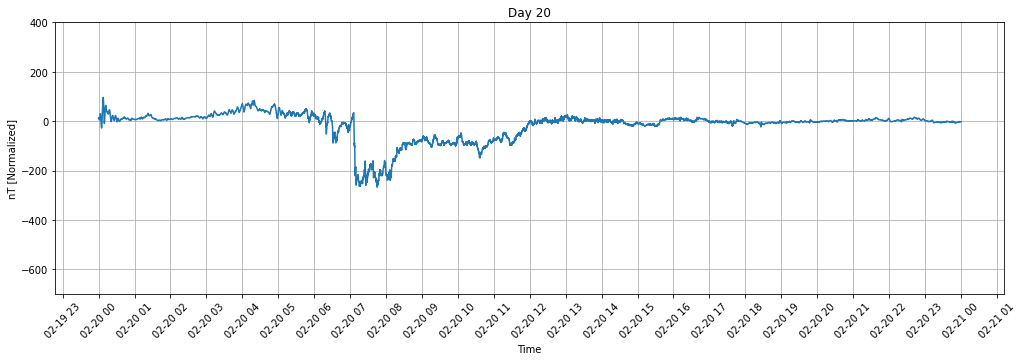

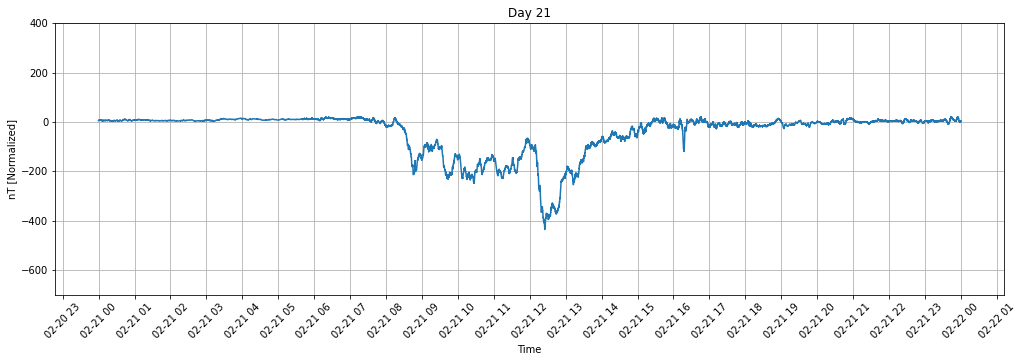

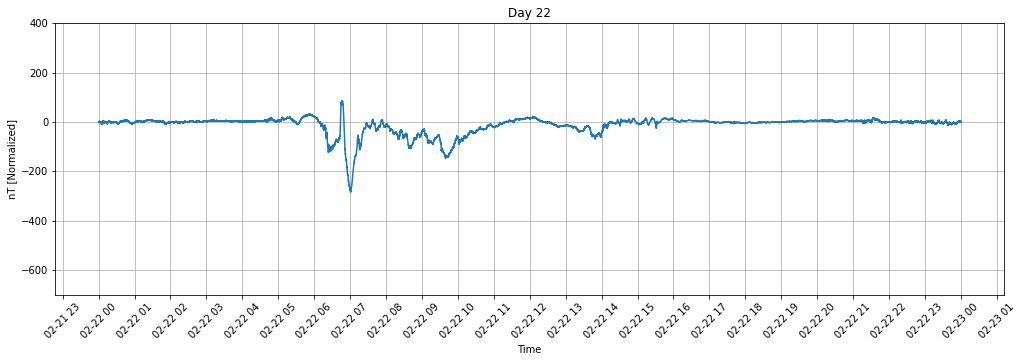

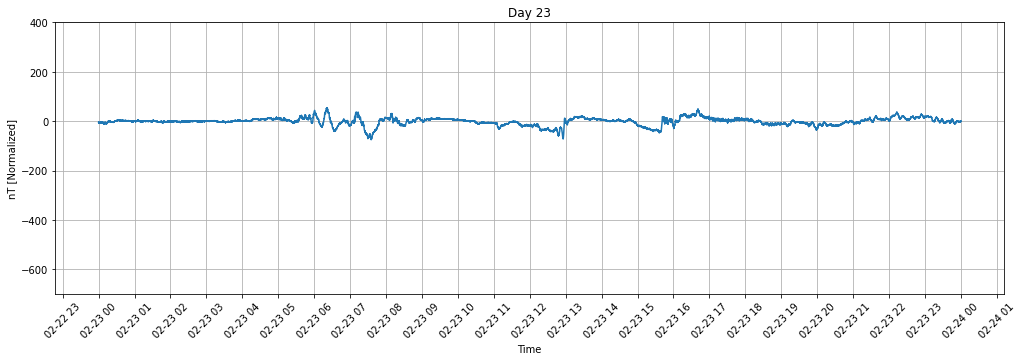

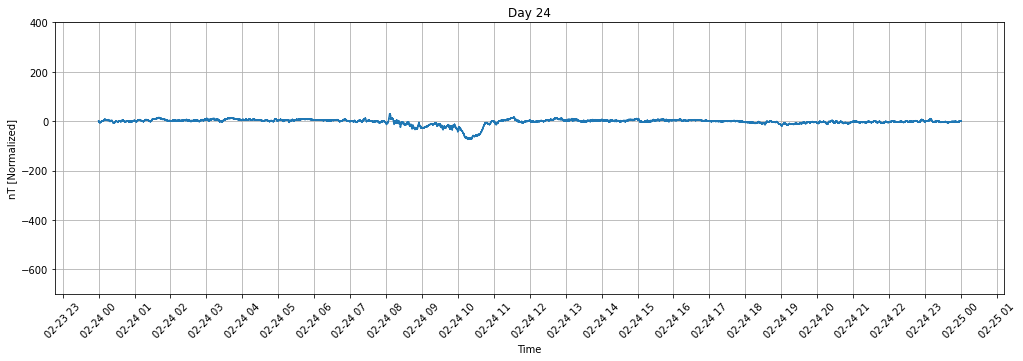

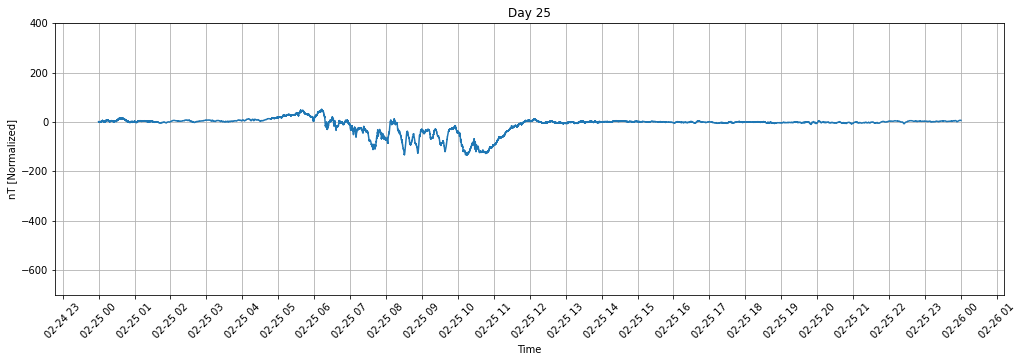

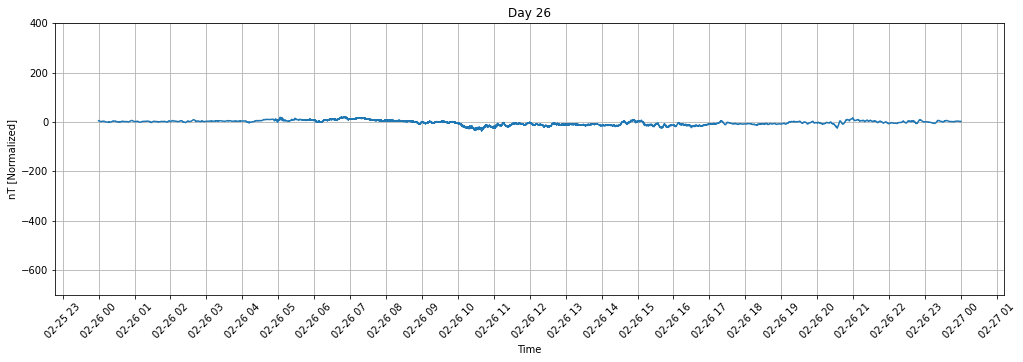

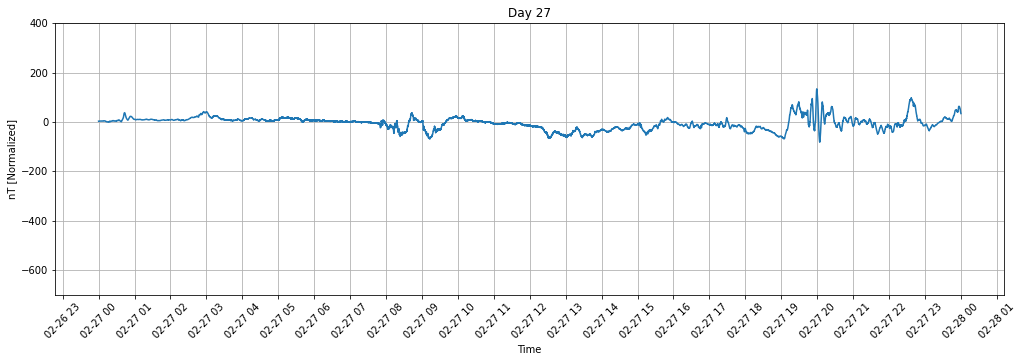

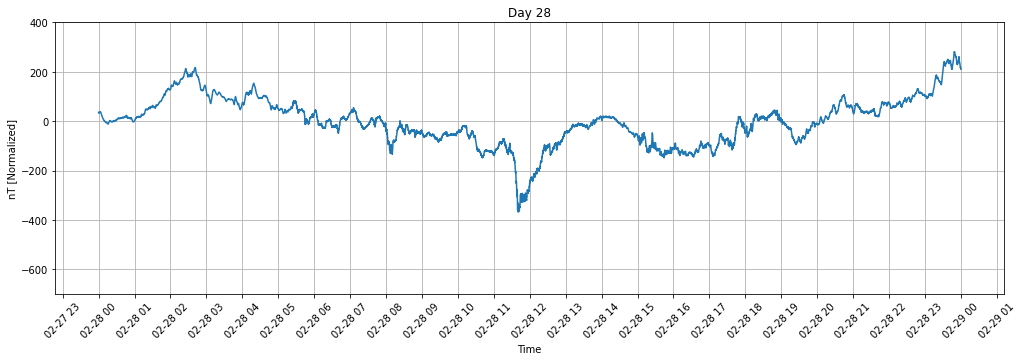

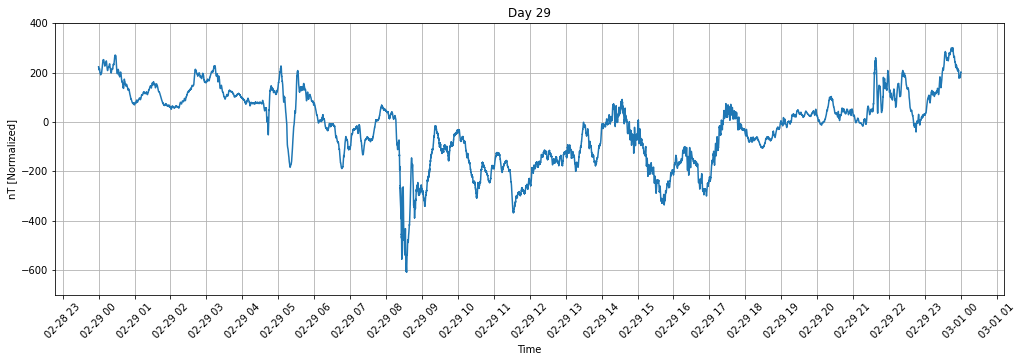

In [93]:
for i in range(len(cdf_dfs)):
    plot_h_date(cdf_dfs[i], i+1)